In [18]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [19]:
# Load the data

train = np.load('data/feature_vectors_train_10knoise.npy')
valid = np.load('data/feature_vectors_val_10knoise.npy')
test = np.load('data/feature_vectors_test_10knoise.npy')

X = np.concatenate((train,valid,test))

print(X.shape)

(10000, 1024, 2)


In [20]:
# transform the data into complex vectors

n_samples = int(X.shape[0])
l = int(X.shape[1])

complex_X = []

start_time = time.time()

for i in range(n_samples):
    
    temp = [complex(X[i,j,0] , X[i,j,1]) for j in range(l)]
    complex_X.append(temp)

delta_time = time.time() - start_time
complex_X = np.asarray(complex_X)
print(complex_X.shape)
print("Time took : ",delta_time)

(10000, 1024)
Time took :  5.466808795928955


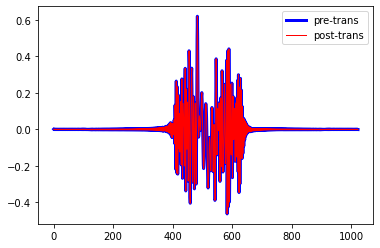

In [21]:
# Test if transformation was fone correctly on real part

plt.plot(X[0,:,0],color='blue',lw=3,label='pre-trans')
plt.plot(complex_X[0].real,color='red',lw=1,label='post-trans')
plt.legend()
plt.show()

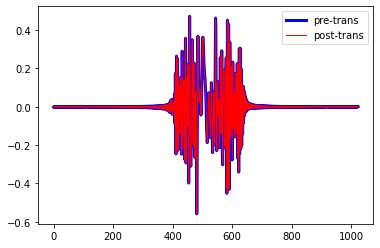

In [22]:
# Test if transformation was fone correctly on imaginary part

plt.plot(X[0,:,1],color='blue',lw=3,label='pre-trans')
plt.plot(complex_X[0].imag,color='red',lw=1,label='post-trans')
plt.legend()
plt.show()

In [23]:
# normalize the data

mean_complex_X = np.mean(complex_X,axis=1,keepdims=True)
print(mean_complex_X.shape)
new_X = complex_X - mean_complex_X

(10000, 1)


total variance percentage :  1.0000000000000002
Number of components needed is :  36


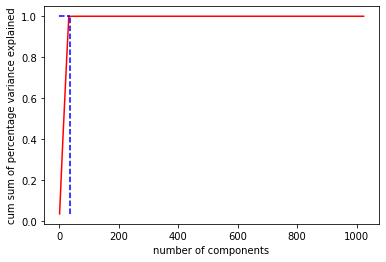

In [24]:
# PCA

A = (new_X.T.conj()).dot(new_X)

# print(A.shape)

eigen_values, eigen_vectors = np.linalg.eig(A)

# print(eigen_vectors.shape)

eigen_values_modules = np.abs(eigen_values)

eigen_values_sorted_indices = np.argsort(eigen_values_modules)
eigen_values_sorted_indices = np.flip(eigen_values_sorted_indices)

eigen_vectors_sorted = eigen_vectors[:,eigen_values_sorted_indices]

eigen_values_sorted = np.sort(eigen_values_modules)
eigen_values_sorted = np.flip(eigen_values_sorted)

percentage_variance_explained = eigen_values_sorted / np.sum(eigen_values_sorted)

print("total variance percentage : ",np.sum(percentage_variance_explained))

cum_sum_percentage_variance_explained = np.cumsum(percentage_variance_explained)

epsilone = 10**(-4)

p=0

for i in range(eigen_values_sorted.shape[0]-1):
  if np.abs(cum_sum_percentage_variance_explained[i+1]) - np.abs(cum_sum_percentage_variance_explained[i]) <= epsilone:
    p=i+1
    break

print('Number of components needed is : ',p)

plt.plot(np.arange(start=1,stop=eigen_values_sorted.shape[0]+1,step=1),np.abs(cum_sum_percentage_variance_explained),color="red",label="cum sum")

plt.plot([p,p],[np.min(np.abs(cum_sum_percentage_variance_explained)),np.abs(cum_sum_percentage_variance_explained[p])],color="blue",linestyle="dashed")

plt.plot([0,p],[np.abs(cum_sum_percentage_variance_explained[p]),np.abs(cum_sum_percentage_variance_explained[p])],color="blue",linestyle="dashed")

plt.xlabel("number of components")
plt.ylabel("cum sum of percentage variance explained")
plt.show()

In [25]:
# Reconstruction

# p_eigen_values = eigen_values_sorted[:p]
p_eigen_vectors = eigen_vectors_sorted[:,:p]

# print(p_eigen_vectors.shape)

Y = new_X.dot(p_eigen_vectors)

X_reconstructed = Y.dot(p_eigen_vectors.T) + mean_complex_X

error = np.sqrt( np.trace( ( complex_X - X_reconstructed ).dot( ( complex_X - X_reconstructed ).T ) ) ) / np.sqrt(np.trace(complex_X.dot(complex_X.T.conj())))

print("error is : ",np.abs(error))
print("new data set shape : ",Y.shape)

error is :  0.05251313985697585
new data set shape :  (10000, 36)


In [26]:
# retransform data to 2-D array

Y_2d = np.asarray([Y.real,Y.imag]).reshape(-1,p,2)

print(Y_2d.shape)

(10000, 36, 2)


In [29]:
# resplit the data

xtrain = Y_2d[:7000]
xvalid = Y_2d[7000:9000]
xtest = Y_2d[9000:]

print(xtrain.shape)
print(xvalid.shape)
print(xtest.shape)

(7000, 36, 2)
(2000, 36, 2)
(1000, 36, 2)


In [27]:
# Save new data

np.save(...)
np.save(...)
np.save(...)